In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
sys.path.append(os.path.abspath("../.."))  # Adds the project root to sys.path
import numpy as np 
import tensorflow as tf

from recommenders.datasets.linear_regression import *

In [9]:
save_rating_values()

In [2]:
product_features, Y, R, num_features, num_products = get_data()

Y (7, 3) R (7, 3)
X (7, 10)
num_features 10
num_products 7
num_users 3


In [ ]:
# my_ratings = np.zeros(num_products)

# my_ratings[0] = 5 # Bosch, Burgija
# my_ratings[1] = 1 # Bosch, Testera
# my_ratings[2] = 1 # Bosch, Testera

# # Add new user ratings to Y 
# Y = np.c_[my_ratings, Y]

# # Add new user indicator matrix to R
# R = np.c_[(my_ratings != 0).astype(int), R]

# Normalize the Dataset


In [ ]:
num_users = Y.shape[1] # FT: It's mandatory because we could add one more user to the matrix

# X, W, b = initialize_tf_variables(product_features, num_features, num_users)

Training loss at iteration 0: 6.8
Training loss at iteration 20: 6.8
Training loss at iteration 40: 6.8
Training loss at iteration 60: 6.8
Training loss at iteration 80: 6.8
Training loss at iteration 100: 6.8
Training loss at iteration 120: 6.8
Training loss at iteration 140: 6.8
Training loss at iteration 160: 6.8
Training loss at iteration 180: 6.8


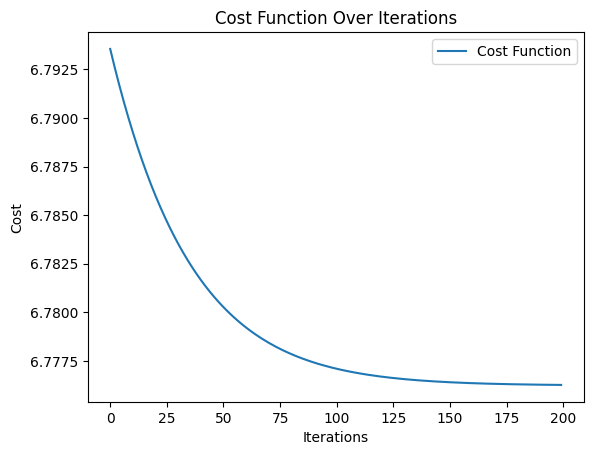

In [ ]:
Ynorm, Ymean = normalize_ratings(Y, R)
calculate_parameters(X, W, b, Ynorm, R, iterations=200, lambda_=1, learning_rate=0.1)



In [9]:
product_names = load_csv_list('../../recommenders/datasets/pa/product_names.csv')

# Make a prediction using trained weights and biases
predictions_normalized = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()

#restore the mean
predictions = predictions_normalized + Ymean

rmse(Y, predictions, R)

my_predictions = predictions[:,0]

# sort predictions
ix = tf.argsort(my_predictions, direction='DESCENDING')

# for i in range(len(my_ratings)):
#     # print(f'{my_predictions[i]:0.2f}')
#     if my_ratings[i] > 0:
#         print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {product_names[i]}')

RMSE score: 0.37481747345299016
